In [3]:
import numpy as np
import matplotlib.pyplot as plt

import adaptivealgo.cli.policy_iter as pi
from adaptivealgo.lib.simulator import Simulator
import adaptivealgo.cli.simulate_policy as sim

In [4]:
n_links = 4
f_thresh = 0.4
actions = [0.1, 0.2, 0.3, 0.4, 0.5]
alpha = 1.0
gamma = 0.2
tol = 1e-6

n_episodes = 10_000

In [8]:
policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
opt_policy: dict = policy["policy"]
print(f"Policy iteration took {i} iterations")

simulator = Simulator(opt_policy, n_links, f_thresh, actions, alpha, gamma)
opt_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime: {int(np.mean(opt_samples))} steps")

Policy iteration took 2 iterations
Mean runtime: 25 steps


In [14]:
random_policy = {s: np.random.randint(0, len(actions)) for s in opt_policy.keys()}
simulator = Simulator(random_policy, n_links, f_thresh, actions, alpha, gamma)
random_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime for random policy: {int(np.mean(random_samples))} steps")

Mean runtime for random policy: 388 steps


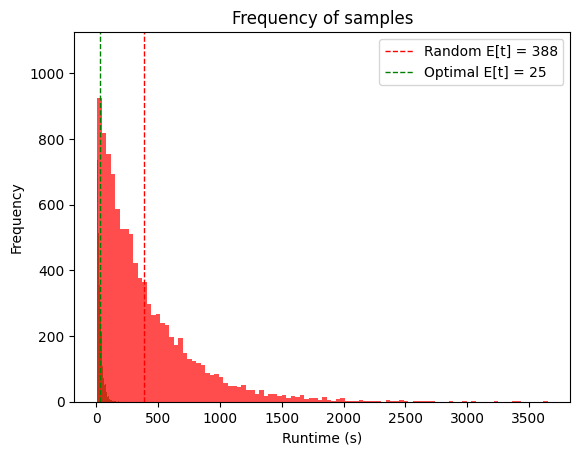

In [15]:
plt.hist(opt_samples, bins=100, color='g', alpha=0.7)
plt.hist(random_samples, bins=100, color='r', alpha=0.7)

plt.axvline(np.mean(random_samples), color='r', linestyle='--', linewidth=1)
plt.axvline(np.mean(opt_samples), color='g', linestyle='--', linewidth=1)

plt.title('Frequency of samples')
plt.xlabel('Runtime (s)')
plt.ylabel('Frequency')

plt.legend([f'Random E[t] = {int(np.mean(random_samples))}', f'Optimal E[t] = {int(np.mean(opt_samples))}'])
plt.show()